In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import pickle
from matplotlib.cm import viridis
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
import mplcursors
import geopandas as gpd
import matplotlib.patches as mpatches

In [2]:
#pip install mplcursors
pd.options.display.max_columns = None

In [3]:
# Load the dataset
df_values = pd.read_csv('training_set_values.csv')
df_labels = pd.read_csv('training_set_labels.csv')

### 1.  EXPLORATORY DATA ANALYSIS

##### Contribution
We conducted the Exploratory Data Analysis (EDA) collectively due to its importance in understanding the data. This collaborative approach allowed us to pool our insights. 
We implemented the different techniques of data wrangling, binning, missing value handling, outlier handling and also feature reduction that were taught during the course. This helped us to achieve better understanding of the data and obtain a clean data to model with.

In [4]:
# Merge the values and labels datasets to check if all the ids in the training_set values has labels
df = pd.merge(df_values, df_labels, on='id')

In [5]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [6]:
df.shape

(59400, 41)

In [7]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
df.select_dtypes(exclude=['number']).describe()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55763,55745,59398,59400,59029,59400,59400,59400,56066,59400,55522,30590,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1896,2145,37399,9,19287,21,125,2092,2,1,11,2695,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


In [9]:
# Check for duplicates
has_duplicates = df_values.duplicated()

# Print if duplicates exist
if has_duplicates.any():
    print("The data has duplicates.")
else:
    print("The data does not have duplicates.")

The data does not have duplicates.


In [10]:
# dropping the column 'id' as we do not require it.
df = df.drop(['id'], axis=1)

In [11]:
# Keeping a copy of original data before moving to the data cleaning process
df_original = df.copy()

In [12]:
# As the coulumn 'status_group' is our target variable, we are encoding it first
# convert status_group label into numerical data
status_group_numeric={'functional':2, 'functional needs repair':1,
                   'non functional':0}
df['status_group_vals']=df.status_group.replace(status_group_numeric)

In [13]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_vals
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,0
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2


In [14]:
df.isnull().sum()[df.isnull().sum() > 1]

funder                3637
installer             3655
wpt_name                 2
subvillage             371
public_meeting        3334
scheme_management     3878
scheme_name          28810
permit                3056
dtype: int64

In [15]:
# Get the column names with null values
missing_value_columns = df.columns[df.isnull().any()]

In [16]:
# Calculate the percentage of missing values for each row
missing_values_percentage = (df.isnull().sum(axis=1) / df.shape[1]) * 100

# Filter rows with greater than 80% missing values
rows_with_missing_values = df[missing_values_percentage > 50]

# Display the filtered rows
rows_with_missing_values.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_vals


In [17]:
# Check if any column has more than 50% missing data
columns_with_high_missing_data = df.columns[df.isnull().mean() > 0.5]

# Print the columns with more than 50% missing data
if columns_with_high_missing_data.any():
    print("Columns with more than 50% missing data:")
    print(columns_with_high_missing_data)
else:
    print("No columns have more than 50% missing data.")

No columns have more than 50% missing data.


In [18]:
#describing all the columns with missing values in it
df[missing_value_columns].describe()

,funder,installer,wpt_name,subvillage,public_meeting,scheme_management,scheme_name,permit
count,55763,55745,59398,59029,56066,55522,30590,56344
unique,1896,2145,37399,19287,2,11,2695,2
top,Government Of Tanzania,DWE,none,Madukani,True,VWC,K,True
freq,9084,17402,3563,508,51011,36793,682,38852


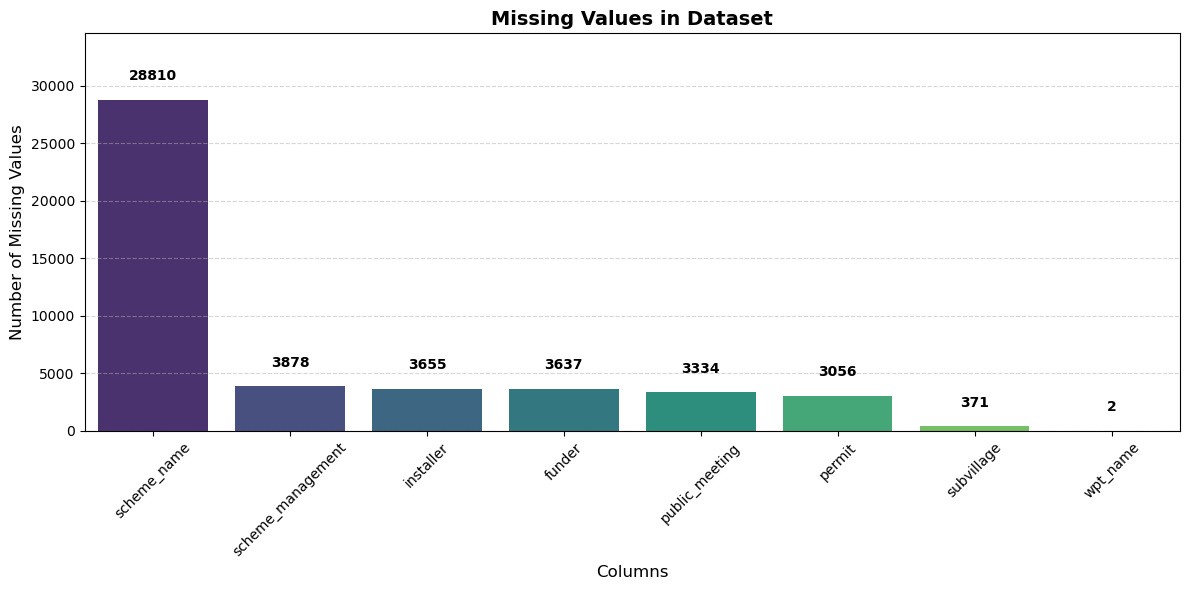

In [19]:
# Assuming df is your DataFrame containing the dataset
 
# Extracting and sorting missing values counts
missing_values = df.isnull().sum()[df.isnull().sum() > 1].sort_values(ascending=False)
 
plt.figure(figsize=(12, 6))
 
# Plotting the bar chart with a consistent palette
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
 
# Adjusting the y-axis limit for better spacing
plt.ylim(0, missing_values.max() * 1.2)
 
# Annotating bars with missing values counts
for i, val in enumerate(missing_values.values):
    plt.text(i, val + missing_values.max() * 0.05, str(val), ha='center', va='bottom', fontsize=10, fontweight='bold')  # Position text slightly above bar
 
# Adding grid lines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.5)
 
# Setting titles and labels
plt.title('Missing Values in Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
 
# Rotating x-axis labels for readability
plt.xticks(rotation=45)
 
# Adjusting layout to fit everything
plt.tight_layout()
 
plt.show()

In [20]:
circle_size = df.isnull().sum()[df.isnull().sum() > 1]

In [21]:
colors = np.random.rand(len(circle_size))

From the above analysis we observe that the column 'scheme_name' has highest number of missing values (28810/59400) and the number of unique values are high as significantly high. Intuitively 'Scheme_name' will not play a major role in determining the functional status of water pump. Hence we're dropping the column 'scheme_name'.

In [22]:
df['scheme_name'].describe()

count     30590
unique     2695
top           K
freq        682
Name: scheme_name, dtype: object

In [23]:
df['scheme_name'].value_counts()

scheme_name
K                       682
Borehole                546
Chalinze wate           405
M                       400
DANIDA                  379
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: count, Length: 2695, dtype: int64

The highest occuring scheme_name is < 0.0001% of the total data. It doesn't help the model with such huge diverse values. Hence it is better to drop the column scheme_name as it has highest number of missing values and shows less significance to model building.

In [24]:
df = df.drop(['scheme_name'], axis=1)

In [25]:
df.shape

(59400, 40)

In [26]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_vals
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,0
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2


In [27]:
# printing the number of null values
df.isnull().sum()[df.isnull().sum() > 1]

funder               3637
installer            3655
wpt_name                2
subvillage            371
public_meeting       3334
scheme_management    3878
permit               3056
dtype: int64

In [28]:
# Treating eachj column with missing values individually
# Column funder
df['funder'].describe()

count                      55763
unique                      1896
top       Government Of Tanzania
freq                        9084
Name: funder, dtype: object

In [29]:
# To see the rows where funder value is missing
df[df['funder'].isnull()]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_vals
34,0.0,2011-02-23,NaN,-41,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,0,Rufiji,Kilombero B,Pwani,60,63,Mafia,Baleni,100,True,GeoData Consultants Ltd,VWC,False,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2
43,0.0,2013-01-15,NaN,1642,NaN,34.967789,-4.628921,Mvae Primary,0,Internal,Mwarufyu,Singida,13,2,Singida Rural,Merya,1,True,GeoData Consultants Ltd,VWC,NaN,1980,mono,mono,motorpump,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional,0
47,0.0,2011-07-27,NaN,0,NaN,33.540607,-9.172905,Mahakamani,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
65,0.0,2013-02-09,NaN,1415,NaN,34.621598,-5.173136,Nyambi,0,Internal,Mfumbu,Singida,13,2,Singida Rural,Naintiri,1,True,GeoData Consultants Ltd,VWC,NaN,1970,mono,mono,motorpump,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional,0
71,0.0,2011-03-31,NaN,0,NaN,34.462228,-8.575780,Kwa Manyusi Mlilo,0,Rufiji,Lembuka,Mbeya,12,7,Mbarali,Mawindi,0,True,GeoData Consultants Ltd,VWC,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59357,0.0,2013-02-19,NaN,1635,NaN,34.971841,-5.098362,Shabani,0,Internal,Mampando A,Singida,13,2,Singida Rural,Ntuntu,1,True,GeoData Consultants Ltd,VWC,NaN,1980,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,0
59366,0.0,2013-02-02,NaN,1541,NaN,34.765729,-5.027725,Joshoni,0,Internal,Mungumaho,Singida,13,2,Singida Rural,Puma,200,True,GeoData Consultants Ltd,VWC,NaN,2000,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2
59370,200.0,2013-01-29,NaN,1154,NaN,30.058731,-4.902633,Village Office,0,Lake Tanganyika,Mazungwe,Kigoma,16,2,Kasulu,Rusesa,1,True,GeoData Consultants Ltd,NaN,False,0,other,other,other,unknown,unknown,pay monthly,monthly,unknown,unknown,unknown,unknown,unknown,other,unknown,other,other,functional,2
59376,0.0,2013-02-03,NaN,1581,NaN,34.821039,-5.076258,Nasingo,0,Internal,Hu,Singida,13,2,Singida Rural,Dung'unyi,1,True,GeoData Consultants Ltd,VWC,NaN,1990,other,other,other,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,other,other,non functional,0


In [30]:
df['region'].unique()

array(['Iringa', 'Mara', 'Manyara', 'Mtwara', 'Kagera', 'Tanga',
       'Shinyanga', 'Tabora', 'Pwani', 'Ruvuma', 'Kilimanjaro', 'Rukwa',
       'Mwanza', 'Kigoma', 'Lindi', 'Dodoma', 'Arusha', 'Mbeya',
       'Singida', 'Morogoro', 'Dar es Salaam'], dtype=object)

Replacing all the values with most occuring funder on the whole doen't make sense 
as the data has huge number of unique funders.
So, we're replacing the null values in funder column with most occuring funder in each region.

In [31]:
# Group the data by 'region' and find the most occurring funder in each group
most_occurring_funders = df.groupby('region')['funder'].agg(lambda x: x.value_counts().index[0])

# Iterate over the DataFrame and replace null values with the most occurring funder based on the 'basin' group
for index, row in df.iterrows():
    if pd.isnull(row['funder']):
        df.at[index, 'funder'] = most_occurring_funders[row['region']]

In [32]:
df['funder'].describe()

count                      59400
unique                      1896
top       Government Of Tanzania
freq                        9426
Name: funder, dtype: object

In [33]:
df['funder'].value_counts()

funder
Government Of Tanzania    9426
Danida                    5061
Hesawa                    2364
Tcrs                      1569
Rwssp                     1397
                          ... 
Muwasa                       1
Msigw                        1
Rc Mofu                      1
Overland High School         1
Samlo                        1
Name: count, Length: 1896, dtype: int64

The column funder has high number of unique values. In order to make it more efficient for the modelling part, we categorise the column using 5 most occuring categories and the rest are classified as other. This way the column funder will have only 6 unique values which is easy to model.

In [34]:
# Create a dictionary to map funders to categories
funder_mapping = {
    'Government Of Tanzania': 'government',
    'Danida': 'danida',
    'Hesawa': 'hesawa',
    'Tcrs': 'tcrs',
    'Rwssp': 'rwssp'
}

In [35]:
# Map funders to categories using the dictionary
df['funder'] = df['funder'].map(funder_mapping).fillna('other')

In [36]:
df['funder'].value_counts()

funder
other         39583
government     9426
danida         5061
hesawa         2364
tcrs           1569
rwssp          1397
Name: count, dtype: int64

In [37]:
piv_table_funder  = pd.pivot_table(df,index=['funder','status_group'],
                           values='status_group_vals', aggfunc='count')

In [38]:
piv_table_funder

status_group_vals
funder     status_group                              
danida     functional                            2849
           functional needs repair                454
           non functional                        1758
government functional                            3923
           functional needs repair                743
           non functional                        4760
hesawa     functional                            1024
           functional needs repair                250
           non functional                        1090
other      functional                           22984
           functional needs repair               2661
           non functional                       13938
rwssp      functional                             816
           functional needs repair                113
           non functional                         468
tcrs       functional                             663
           functional needs repair                 96
           non functional                         810

In [39]:
# printing the number of null values
df.isnull().sum()[df.isnull().sum() > 1]

installer            3655
wpt_name                2
subvillage            371
public_meeting       3334
scheme_management    3878
permit               3056
dtype: int64

In the data (csv file), we observe that the installer name and funder name is same in most of the cases.
Hence it is safe for us to drop the column 'installer'.

In [40]:
df = df.drop(['installer'], axis=1)

In [41]:
df['wpt_name'].describe()

count     59398
unique    37399
top        none
freq       3563
Name: wpt_name, dtype: object

In [42]:
df['wpt_name'].value_counts()

wpt_name
none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: count, Length: 37399, dtype: int64

wpt_name has very high number of unique values. The column just fetches the water point name which might not be of major use for the model. Hence it is safe to drop this column.

In [43]:
df = df.drop(['wpt_name'], axis=1)

In [44]:
df.shape

(59400, 38)

In [45]:
# To see the rows where subvillage value is missing
df[df['subvillage'].isnull()]

,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_vals
342,0.0,2011-03-16,government,0,36.557631,-6.233394,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Sagara,0,True,GeoData Consultants Ltd,VWC,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe multiple,communal standpipe,non functional,0
360,0.0,2011-03-25,other,0,36.416701,-6.220157,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Kongwa Urban,0,True,GeoData Consultants Ltd,VWC,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,0
379,0.0,2011-03-20,other,0,36.729383,-6.084255,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Pandambili,0,True,GeoData Consultants Ltd,VWC,False,0,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional,2
565,0.0,2011-03-18,other,0,36.696881,-5.993192,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Njoge,0,True,GeoData Consultants Ltd,VWC,False,0,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,0
966,0.0,2011-03-11,other,0,36.322623,-6.030500,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Sejeli,0,True,GeoData Consultants Ltd,VWC,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59008,0.0,2011-03-23,other,0,36.770490,-6.288555,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Mlali,0,True,GeoData Consultants Ltd,VWC,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
59091,0.0,2011-03-14,other,0,36.407974,-5.715084,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Zoissa,0,True,GeoData Consultants Ltd,VWC,False,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,salty,salty,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional,0
59105,0.0,2011-03-19,other,0,36.889359,-5.959966,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Pandambili,0,True,GeoData Consultants Ltd,VWC,False,0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,salty,salty,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,0
59215,0.0,2011-03-19,other,0,36.854216,-6.010508,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Pandambili,0,True,GeoData Consultants Ltd,VWC,False,0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,salty,salty,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,0


In [46]:
df['subvillage'].describe()

count        59029
unique       19287
top       Madukani
freq           508
Name: subvillage, dtype: object

In [47]:
df['subvillage'].value_counts()

subvillage
Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: count, Length: 19287, dtype: int64

In [48]:
# Unlike funder and installer it is hard to categorize them into 5 or 6 subvillages because values are not dominating 
# 19287 unique values are present
# top 5 values of subvillage are not dominating numbers compared to the total number of rows.
# Hence it is safe to drop the column 'subvillage'

In [49]:
df = df.drop(['subvillage'], axis=1)

In [50]:
df.shape

(59400, 37)

In [51]:
df['public_meeting'].describe()

count     56066
unique        2
top        True
freq      51011
Name: public_meeting, dtype: object

In [52]:
df['public_meeting'].unique()

array([True, nan, False], dtype=object)

In [53]:
# As the column 'public_meeting' is a boolean column, 
# it is safe for us to replace the missing values with most occuring value.
df['public_meeting'].fillna(df['public_meeting'].mode()[0], inplace=True)

In [54]:
df['scheme_management'].describe()

count     55522
unique       11
top         VWC
freq      36793
Name: scheme_management, dtype: object

In [55]:
count_sm_vwc = df['scheme_management'].value_counts()['VWC']
print(count_sm_vwc)

36793


In [56]:
# As more than 60% of the data has VWC as scheme_management, it is safe for us to replace the missing values with VWC
df['scheme_management'].fillna(df['scheme_management'].mode()[0], inplace=True)

In [57]:
df['scheme_management'].value_counts()

scheme_management
VWC                 40671
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64

In [58]:
df['permit'].describe()

count     56344
unique        2
top        True
freq      38852
Name: permit, dtype: object

In [59]:
df['permit'].unique()

array([False, True, nan], dtype=object)

In [60]:
# As the column 'public_meeting' is a boolean column, 
# it is safe for us to replace the missing values with most occuring value.
df['permit'].fillna(df['permit'].mode()[0], inplace=True)

In [61]:
df['permit'].value_counts()

permit
True     41908
False    17492
Name: count, dtype: int64

In [62]:
# Checking for missing values after handling missing values
df.isnull().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
longitude                0
latitude                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
status_group_vals        0
d

In [63]:
# Now that we have handled all the missing values, let's see how out data looks like at the present.
def describe_with_unique(df):
    # Get the statistical summary
    desc = df.describe(include='all')
 
    # Convert to a DataFrame to make it easier to manipulate
    desc = pd.DataFrame(desc)
 
    # Compute the unique counts for each column
    unique_counts = df.nunique()
 
    # Add the unique counts to the description
    desc.loc['unique'] = unique_counts
 
    return desc

In [64]:
describe_with_unique(df)

,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_vals
count,59400.000000,59400,59400,59400.000000,59400.000000,5.940000e+04,59400.000000,59400,59400,59400.000000,59400.000000,59400,59400,59400.000000,59400,59400,59400,59400,59400.000000,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400.000000
unique,98.000000,356,6,2428.000000,57516.000000,5.751700e+04,65.000000,9,21,27.000000,20.000000,125,2092,1049.000000,2,1,11,2,55.000000,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3,3.000000
top,NaN,2011-03-15,other,NaN,NaN,NaN,NaN,Lake Victoria,Iringa,NaN,NaN,Njombe,Igosi,NaN,True,GeoData Consultants Ltd,VWC,True,NaN,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,NaN
freq,NaN,572,39583,NaN,NaN,NaN,NaN,10248,5294,NaN,NaN,2503,307,NaN,54345,59400,40671,41908,NaN,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259,NaN
mean,317.650385,NaN,NaN,668.297239,34.077427,-5.706033e+00,0.474141,NaN,NaN,15.297003,5.629747,NaN,NaN,179.909983,NaN,NaN,NaN,NaN,1300.652475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.158838
std,2997.574558,NaN,NaN,693.116350,6.567432,2.946019e+00,12.236230,NaN,NaN,17.587406,9.633649,NaN,NaN,471.482176,NaN,NaN,NaN,NaN,951.620547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.949794
min,0.000000,NaN,NaN,-90.000000,0.000000,-1.164944e+01,0.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,0.000000,NaN,NaN,0.000000,33.090347,-8.540621e+00,0.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,0.000000,NaN,NaN,369.000000,34.908743,-5.021597e+00,0.000000,NaN,NaN,12.000000,3.000000,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,1986.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,20.000000,NaN,NaN,1319.250000,37.178387,-3.326156e+00,0.000000,NaN,NaN,17.000000,5.000000,NaN,NaN,215.000000,NaN,NaN,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


Observing the data in detail in the csv file, we see the column 'construction_year' has different years. It would be much easier if we make the construction years in range for computation of the model.

In [65]:
df['construction_year'].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [66]:
df['construction_year'].value_counts()

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

#### Binning Technique
Seeing the data it can be assumed that the year is filled as 0 for the ones for which the year of contruction is not known. The rest can be categorised as decades. 60s,70s,80s,90s,2000s,2010s.
Latest year in the dataset is 2013, hence categories till 2010s will be sufficient.

In [67]:
def construction_wrangler(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '2000s'
    elif row['construction_year'] >= 2010:
        return '2010s'
    else:
        return 'unknown'

In [68]:
df['construction_year'] = df.apply(lambda row: construction_wrangler(row), axis=1)

In [69]:
df['construction_year'].value_counts()

construction_year
unknown    20709
2000s      15330
90s         7678
80s         5578
2010s       5161
70s         4406
60s          538
Name: count, dtype: int64

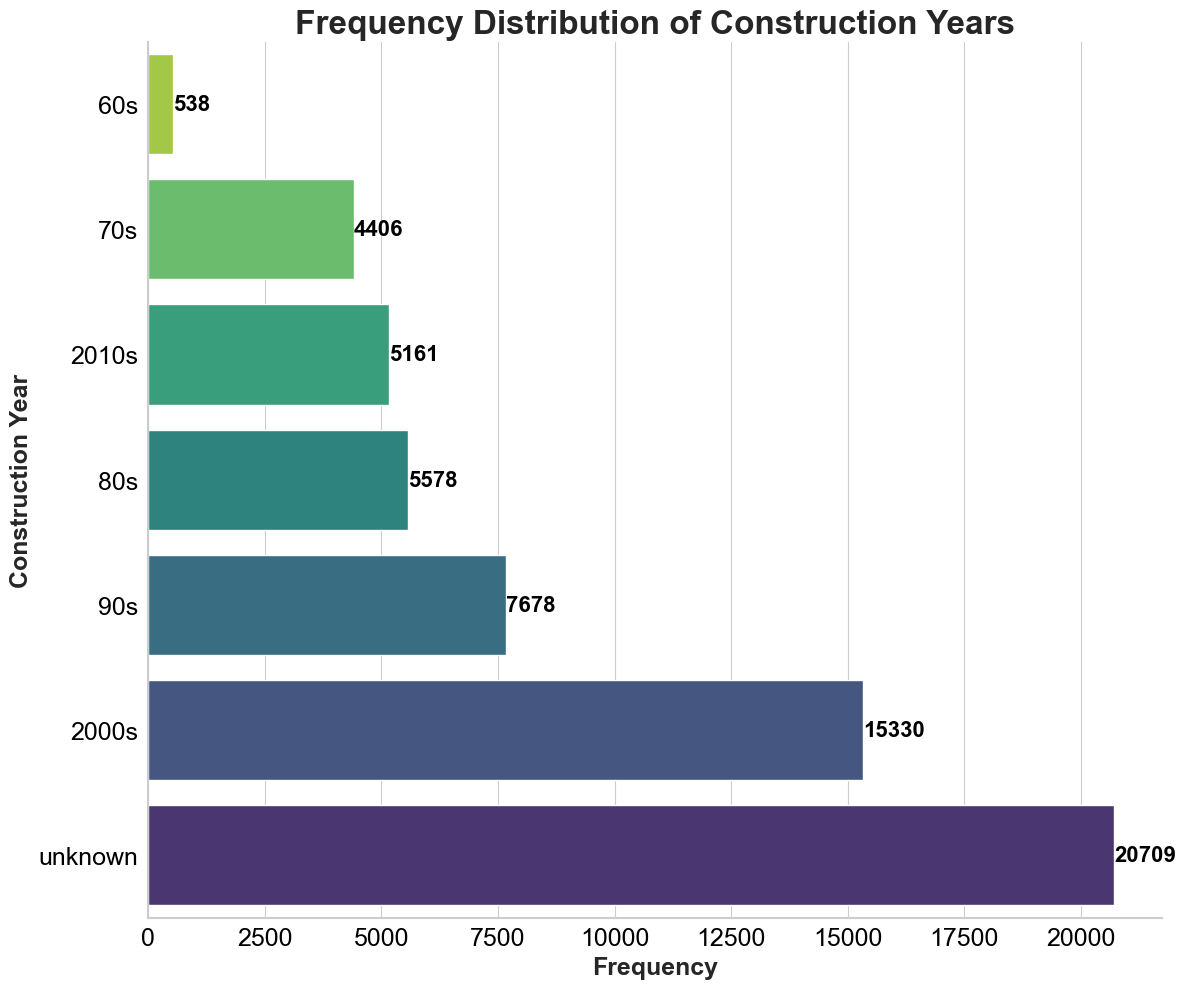

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a frequency distribution of the construction_years variable
construction_years_freq = df['construction_year'].value_counts().sort_values(ascending=False)

# Create a vertical bar plot using Seaborn
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")
ax = sns.barplot(x=construction_years_freq.values, y=construction_years_freq.index, orient='h', palette='viridis')

# Add labels and title with bold font and increased size
ax.set_xlabel('Frequency', fontsize=18, fontweight='bold')
ax.set_ylabel('Construction Year', fontsize=18, fontweight='bold')
ax.set_title('Frequency Distribution of Construction Years', fontsize=24, fontweight='bold')

# Add value labels to the bars with bold font and increased size
for i, v in enumerate(construction_years_freq.values):
    ax.text(v + 0.1, i, str(v), color='black', fontsize=16, fontweight='bold', va='center')

# Customize the appearance
ax.invert_yaxis() # Invert the y-axis to show highest frequency at the top
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(colors='black', labelsize=16)

# Increase the font size of x and y axis values
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adjust the layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

In [71]:
df.shape

(59400, 37)

In [72]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'longitude',
       'latitude', 'num_private', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group', 'status_group_vals'],
      dtype='object')

In [73]:
df['date_recorded'].describe()

count          59400
unique           356
top       2011-03-15
freq             572
Name: date_recorded, dtype: object

In [74]:
df['region'].value_counts()

region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: count, dtype: int64

In [75]:
df['region_code'].value_counts()

region_code
11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: count, dtype: int64

In [76]:
df['extraction_type_class'].describe()

count       59400
unique          7
top       gravity
freq        26780
Name: extraction_type_class, dtype: object

In [77]:
df['extraction_type_class'].value_counts()

extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: count, dtype: int64

In [78]:
df['extraction_type_group'].describe()

count       59400
unique         13
top       gravity
freq        26780
Name: extraction_type_group, dtype: object

In [79]:
df['extraction_type_group'].value_counts()

extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: count, dtype: int64

In [80]:
df['source_class'].value_counts()

source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64

In [81]:
df['source'].value_counts()

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64

In [82]:
df['waterpoint_type'].value_counts()

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64

In [83]:
df['waterpoint_type_group'].value_counts()

waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: count, dtype: int64

In [84]:
df['num_private'].describe()

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64

In [85]:
df['recorded_by'].describe()

count                       59400
unique                          1
top       GeoData Consultants Ltd
freq                        59400
Name: recorded_by, dtype: object

In [86]:
df['quantity'].value_counts()

quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

In [87]:
df['quantity_group'].value_counts()

quantity_group
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

In [88]:
df['quality_group'].value_counts()

quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: count, dtype: int64

In [89]:
df['water_quality'].value_counts()

water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64

In [90]:
dropping_columns = ['date_recorded','num_private', 'recorded_by','extraction_type_group',
       'management', 'payment', 'quantity','water_quality','waterpoint_type', 'status_group']

In [91]:
df = df.drop(df[dropping_columns], axis=1)

#### Analysis using raw data
1. Date_recorded -> We already have the contruction year. This will not be used for predicting if the waterpump is functional or not.
2. num_private -> Not clear how this can be used. No description given on the challenge website too.
3. recorded_by -> All the columns have same value
4. extraction_type_group -> similar to extraction_type_class. extraction_type_class is better as it has 7 unique values and can be used better
5. management -> Same values to management_group. management_group has values merged. 
6. payment -> payment and payment_type are same.
7. quantity -> quantity and quantity_group. Either of them can be dropped.
8. waterpoint_type -> waterpoint_type is same as waterpoint_type_group
9. status_group -> Already encoded

#### FEATURE REDUCTION

Exploring further categorical columns to drop more columns that might complicate the model while one-hot encoding.

In [92]:
# Select only the categorical columns
categorical_columns = df.select_dtypes(include=["object"])

# Describe unique categorical values in each column
unique_values = {column: df[column].value_counts().index.tolist() for column in categorical_columns}

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Column: {column}")
    print(f"Unique values: {values}")
    print("---------------------------")

Column: funder
Unique values: ['other', 'government', 'danida', 'hesawa', 'tcrs', 'rwssp']
---------------------------
Column: basin
Unique values: ['Lake Victoria', 'Pangani', 'Rufiji', 'Internal', 'Lake Tanganyika', 'Wami / Ruvu', 'Lake Nyasa', 'Ruvuma / Southern Coast', 'Lake Rukwa']
---------------------------
Column: region
Unique values: ['Iringa', 'Shinyanga', 'Mbeya', 'Kilimanjaro', 'Morogoro', 'Arusha', 'Kagera', 'Mwanza', 'Kigoma', 'Ruvuma', 'Pwani', 'Tanga', 'Dodoma', 'Singida', 'Mara', 'Tabora', 'Rukwa', 'Mtwara', 'Manyara', 'Lindi', 'Dar es Salaam']
---------------------------
Column: lga
Unique values: ['Njombe', 'Arusha Rural', 'Moshi Rural', 'Bariadi', 'Rungwe', 'Kilosa', 'Kasulu', 'Mbozi', 'Meru', 'Bagamoyo', 'Singida Rural', 'Kilombero', 'Same', 'Kibondo', 'Kyela', 'Kahama', 'Magu', 'Kigoma Rural', 'Maswa', 'Karagwe', 'Mbinga', 'Iringa Rural', 'Serengeti', 'Namtumbo', 'Lushoto', 'Songea Rural', 'Mpanda', 'Mvomero', 'Ngara', 'Ulanga', 'Makete', 'Kwimba', 'Mbarali', 'Ha

Dropping columns having more than 12 unique values as this will be less significant after encoding for the modelling aspect.

In [93]:
# Select only the categorical columns
categorical_columns = df.select_dtypes(include=["object"])

# Get the list of categorical columns with more than 12 unique values
columns_with_more_than_12_unique_values = [column for column in categorical_columns if df[column].nunique() > 12]

In [94]:
columns_with_more_than_12_unique_values

['region', 'lga', 'ward', 'extraction_type']

In [95]:
df = df.drop(df[columns_with_more_than_12_unique_values], axis=1)

In [96]:
df.shape

(59400, 23)

In [97]:
# Select only the categorical columns
categorical_columns = df.select_dtypes(include=["object"])

# Describe unique categorical values in each column
unique_values = {column: df[column].value_counts().index.tolist() for column in categorical_columns}

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Column: {column}")
    print(f"Unique values: {values}")
    print("---------------------------")

Column: funder
Unique values: ['other', 'government', 'danida', 'hesawa', 'tcrs', 'rwssp']
---------------------------
Column: basin
Unique values: ['Lake Victoria', 'Pangani', 'Rufiji', 'Internal', 'Lake Tanganyika', 'Wami / Ruvu', 'Lake Nyasa', 'Ruvuma / Southern Coast', 'Lake Rukwa']
---------------------------
Column: scheme_management
Unique values: ['VWC', 'WUG', 'Water authority', 'WUA', 'Water Board', 'Parastatal', 'Private operator', 'Company', 'Other', 'SWC', 'Trust']
---------------------------
Column: construction_year
Unique values: ['unknown', '2000s', '90s', '80s', '2010s', '70s', '60s']
---------------------------
Column: extraction_type_class
Unique values: ['gravity', 'handpump', 'other', 'submersible', 'motorpump', 'rope pump', 'wind-powered']
---------------------------
Column: management_group
Unique values: ['user-group', 'commercial', 'parastatal', 'other', 'unknown']
---------------------------
Column: payment_type
Unique values: ['never pay', 'per bucket', 'mon

In [98]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,status_group_vals
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,15.297003,5.629747,179.909983,1.158838
std,2997.574558,693.116350,6.567432,2.946019e+00,17.587406,9.633649,471.482176,0.949794
min,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,12.000000,3.000000,25.000000,2.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,17.000000,5.000000,215.000000,2.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,99.000000,80.000000,30500.000000,2.000000


In [99]:
df.select_dtypes(exclude=['number']).describe()

,funder,basin,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source,source_type,source_class,waterpoint_type_group
count,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,6,9,2,11,2,7,7,5,7,6,5,10,7,3,6
top,other,Lake Victoria,True,VWC,True,unknown,gravity,user-group,never pay,good,enough,spring,spring,groundwater,communal standpipe
freq,39583,10248,54345,40671,41908,20709,26780,52490,25348,50818,33186,17021,17021,45794,34625


#### Outlier detection for test data

In [100]:
# Filter only numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Select only numerical data
numerical_df = df[numerical_columns]

In [101]:
# set the z-score threshold for identifying outliers
threshold = 5

# find columns with z-scores greater than the threshold
outlier_columns = numerical_df.columns[(np.abs((numerical_df - numerical_df.mean()) / numerical_df.std()) > threshold).any()]

# print the columns that may need outlier handling
print(outlier_columns)

Index(['amount_tsh', 'longitude', 'district_code', 'population'], dtype='object')


In [102]:
# create dataset to include only the outlier columns
outlier_df = numerical_df[outlier_columns]
outlier_df

,amount_tsh,longitude,district_code,population
0,6000.0,34.938093,5,109
1,0.0,34.698766,2,280
2,25.0,37.460664,4,250
3,0.0,38.486161,63,58
4,0.0,31.130847,1,0
...,...,...,...,...
59395,10.0,37.169807,5,125
59396,4700.0,35.249991,4,56
59397,0.0,34.017087,7,0
59398,0.0,35.861315,4,0


In [103]:
# district_code is unique so outlier should'nt matter much. Hence dropping the column from outlier handling
outlier_df = outlier_df.drop('district_code',axis=1)

In [104]:
# updating the outlier column names after dropping 'district_code'
outlier_columns =  outlier_columns.drop(['district_code'])

In [105]:
outlier_df.describe()

,amount_tsh,longitude,population
count,59400.000000,59400.000000,59400.000000
mean,317.650385,34.077427,179.909983
std,2997.574558,6.567432,471.482176
min,0.000000,0.000000,0.000000
25%,0.000000,33.090347,0.000000
50%,0.000000,34.908743,25.000000
75%,20.000000,37.178387,215.000000
max,350000.000000,40.345193,30500.000000


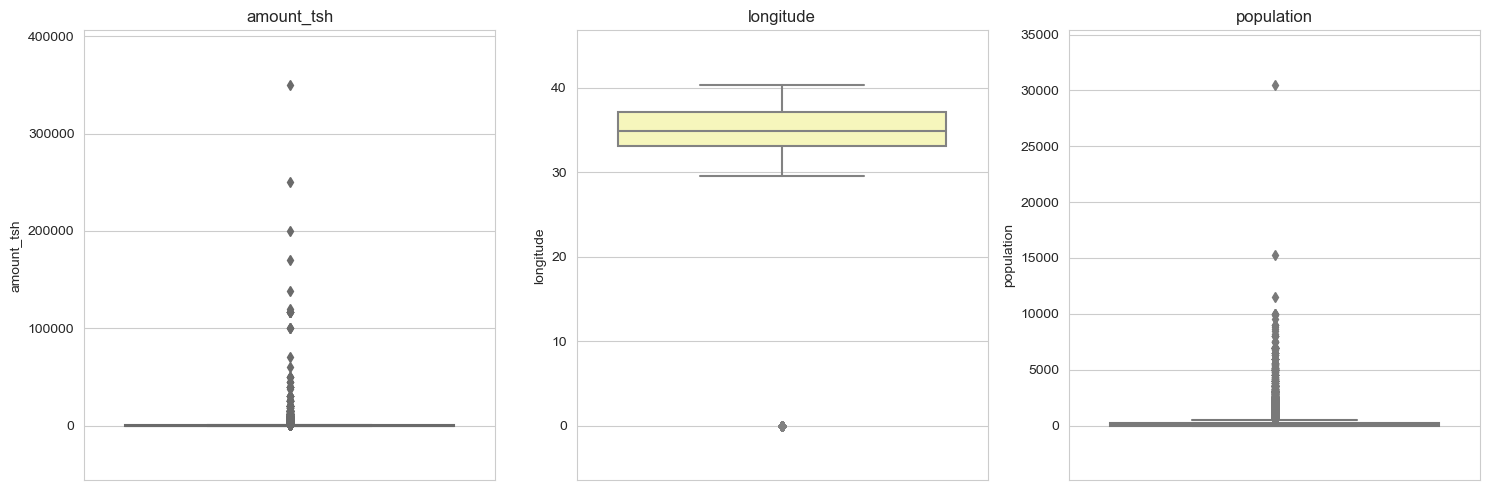

In [106]:
# Create subplots for each outlier column
num_columns = len(outlier_columns)
fig, axes = plt.subplots(1, num_columns, figsize=(15, 5))

# Define a custom color palette
color_palette = sns.color_palette("Set3", n_colors=num_columns)

# Plot box plots for each outlier column with specified color palette
for i, column in enumerate(outlier_columns):
    sns.boxplot(data=df, y=column, ax=axes[i], showfliers=True, palette=[color_palette[i]])
    axes[i].set_title(column)
    
    # Adjust the y-axis limits for better visibility
    ymin, ymax = axes[i].get_ylim()
    axes[i].set_ylim(ymin - 0.1*(ymax-ymin), ymax + 0.1*(ymax-ymin))

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

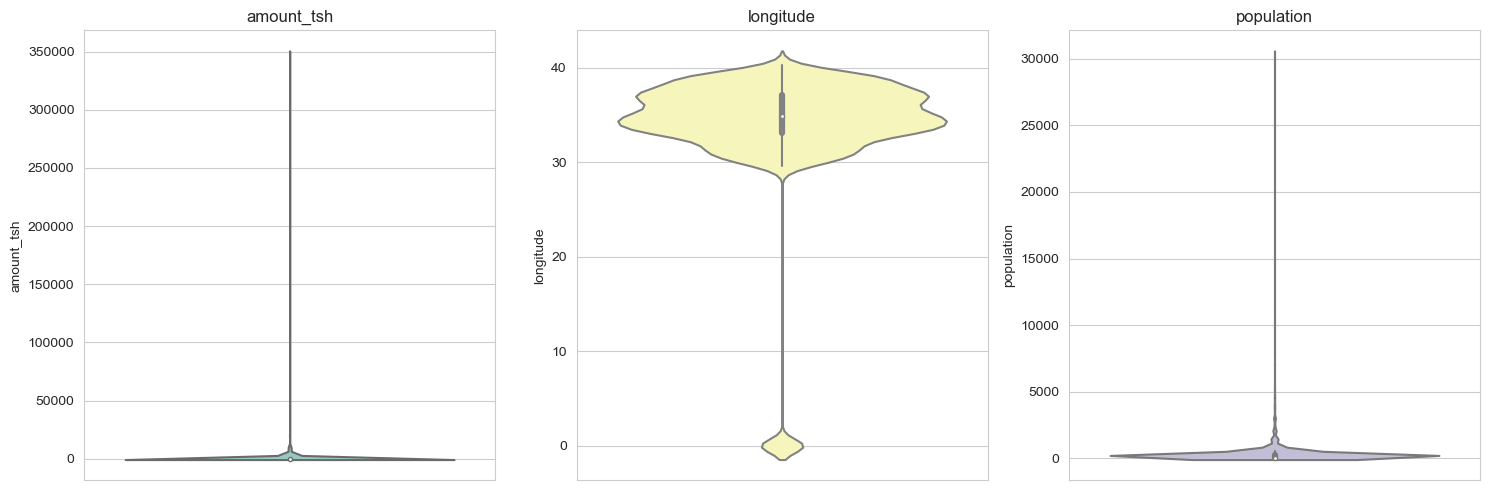

In [107]:
# Create subplots for each outlier column
num_columns = len(outlier_columns)
fig, axes = plt.subplots(1, num_columns, figsize=(15, 5))

# Define a custom color palette
color_palette = sns.color_palette("Set3", n_colors=num_columns)

# Plot violin plots for each outlier column with specified color palette
for i, column in enumerate(outlier_columns):
    sns.violinplot(data=df, y=column, ax=axes[i], palette=[color_palette[i]])
    axes[i].set_title(column)

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

### Handling outliers

#### Handling outliers in 'amount_tsh' column

'amount_tsh' represents - Total static head (amount water available to waterpoint)
Observing the outlier values in CSV and the grapgh we observe that there is a huge difference in 3rd quartile and maximum values. To remove this outlier we are using cappung method. We are capping the values to 5 times the 75th quartile value.

In [108]:
# Calculate the lower and upper bounds for capping
lb_amount_tsh, ub_amount_tsh = np.percentile(df['amount_tsh'], [5, 95])

# Cap the outliers
df['amount_tsh'] = np.clip(df['amount_tsh'], lb_amount_tsh, ub_amount_tsh)

In [109]:
df['amount_tsh'].describe()

count    59400.000000
mean       129.246344
std        313.994729
min          0.000000
25%          0.000000
50%          0.000000
75%         20.000000
max       1200.000000
Name: amount_tsh, dtype: float64

#### Handling outliers in 'longitude' column

Longitude values can be varied according to the location of the water pump. 
From the graph we see that the outlier in longitude is at the point 0. We can assume that it is entered as 0 when the longitude is not known hence we replace all the 

To solve this, we will can replace all the  0 longitudinal values by the average of the logitude values given set of values. This ensures that the area we're looking is in and around the same zone as others.

In [110]:
# Replace zero values with NaN
df['longitude'].replace(0, np.nan, inplace=True)

# Replace NaN values with mean of non-NaN values in each column
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

In [111]:
df['longitude'].describe()

count    59400.000000
mean        35.149669
std          2.567349
min         29.607122
25%         33.354079
50%         35.149669
75%         37.178387
max         40.345193
Name: longitude, dtype: float64

The column 'num_private' isn't seeming to be signifiocant as the value of the column is 0 upto 3rd quartile. Hence we are dropping this column.

The column 'district_code' column can logically be any 2 digit district_code. As no value is violating this, we are not performing any outlier handling here.

#### 'population', 'water_quality' column outlier handling

To handle the 'population' and 'water_quality' outliers, we are using the same methodology of capping as 'amount_tsh' 

In [112]:
# Calculate the lower and upper bounds for capping
lb, ub = np.percentile(df['population'], [5, 95])

# Cap the outliers
df['population'] = np.clip(df['population'], lb, ub)

In [113]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,status_group_vals
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000
mean,129.246344,668.297239,35.149669,-5.706033e+00,15.297003,5.629747,136.993199,1.158838
std,313.994729,693.116350,2.567349,2.946019e+00,17.587406,9.633649,197.177932,0.949794
min,0.000000,-90.000000,29.607122,-1.164944e+01,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.354079,-8.540621e+00,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,35.149669,-5.021597e+00,12.000000,3.000000,25.000000,2.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,17.000000,5.000000,215.000000,2.000000
max,1200.000000,2770.000000,40.345193,-2.000000e-08,99.000000,80.000000,680.000000,2.000000


In [114]:
df_encoded = df.copy()

In [115]:
#Performing one-hot encoding to convert the categorical columns to numerical
# Select categorical columns
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

# Perform one-hot encoding using get_dummies
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns)

In [116]:
# shape of df_encoded
df_encoded.shape

(59400, 99)

In [117]:
df_encoded.describe()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,status_group_vals
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000
mean,129.246344,668.297239,35.149669,-5.706033e+00,15.297003,5.629747,136.993199,1.158838
std,313.994729,693.116350,2.567349,2.946019e+00,17.587406,9.633649,197.177932,0.949794
min,0.000000,-90.000000,29.607122,-1.164944e+01,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.354079,-8.540621e+00,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,35.149669,-5.021597e+00,12.000000,3.000000,25.000000,2.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,17.000000,5.000000,215.000000,2.000000
max,1200.000000,2770.000000,40.345193,-2.000000e-08,99.000000,80.000000,680.000000,2.000000


In [118]:
df_encoded['status_group_vals'].value_counts()

status_group_vals
2    32259
0    22824
1     4317
Name: count, dtype: int64

Our data is cleaned with all the missing values, outliers handled and Data is encoded. Now let's do the Feature selection to work on only selected features here on.

In [119]:
X_for_fs = df_encoded.drop('status_group_vals', axis = 1)
y_for_fs = df_encoded['status_group_vals']

In [120]:
# Before looking into oversampling we need to split the data into train and test

from sklearn.model_selection import train_test_split

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_for_fs, y_for_fs, test_size=0.3, random_state=1234, stratify = y_for_fs)

## 2. FEATURE SELECTION

#### Using Random Forest for feature selection

##### Contribution
Vedashree worked on the feature selection. After reduing the features we had to select features that were important for the classification model. This was done by Vedashree using Random forest feature importances. The attributes having 2% of importance in classifying the water pumps were selected. The same features are further used for all the model building.

All three of us later collectively worked on deciding the visualisations to represent the same.

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X_train_fs, y_train_fs)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'Feature': X_train_fs.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

                      Feature  Importance
2                   longitude    0.150436
3                    latitude    0.149709
1                  gps_height    0.075145
67         quantity_group_dry    0.072614
6                  population    0.049624
..                        ...         ...
76               source_other    0.000288
29    scheme_management_Trust    0.000238
28      scheme_management_SWC    0.000130
81             source_unknown    0.000126
94  waterpoint_type_group_dam    0.000022

[98 rows x 2 columns]


In [123]:
# Filter the importance DataFrame based on importance threshold
filtered_df = feature_importances_df[feature_importances_df["Importance"] > 0.02]

# Print the columns with importance values greater than 0.02
print(filtered_df["Feature"].tolist())

['longitude', 'latitude', 'gps_height', 'quantity_group_dry', 'population', 'waterpoint_type_group_other', 'quantity_group_enough', 'district_code', 'extraction_type_class_other', 'amount_tsh', 'region_code']


/var/folders/93/5qlh2lh93tl__8bywdt_dp500000gn/T/ipykernel_29740/3408356777.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(top_features['Feature'], fontsize=18, fontweight='bold')


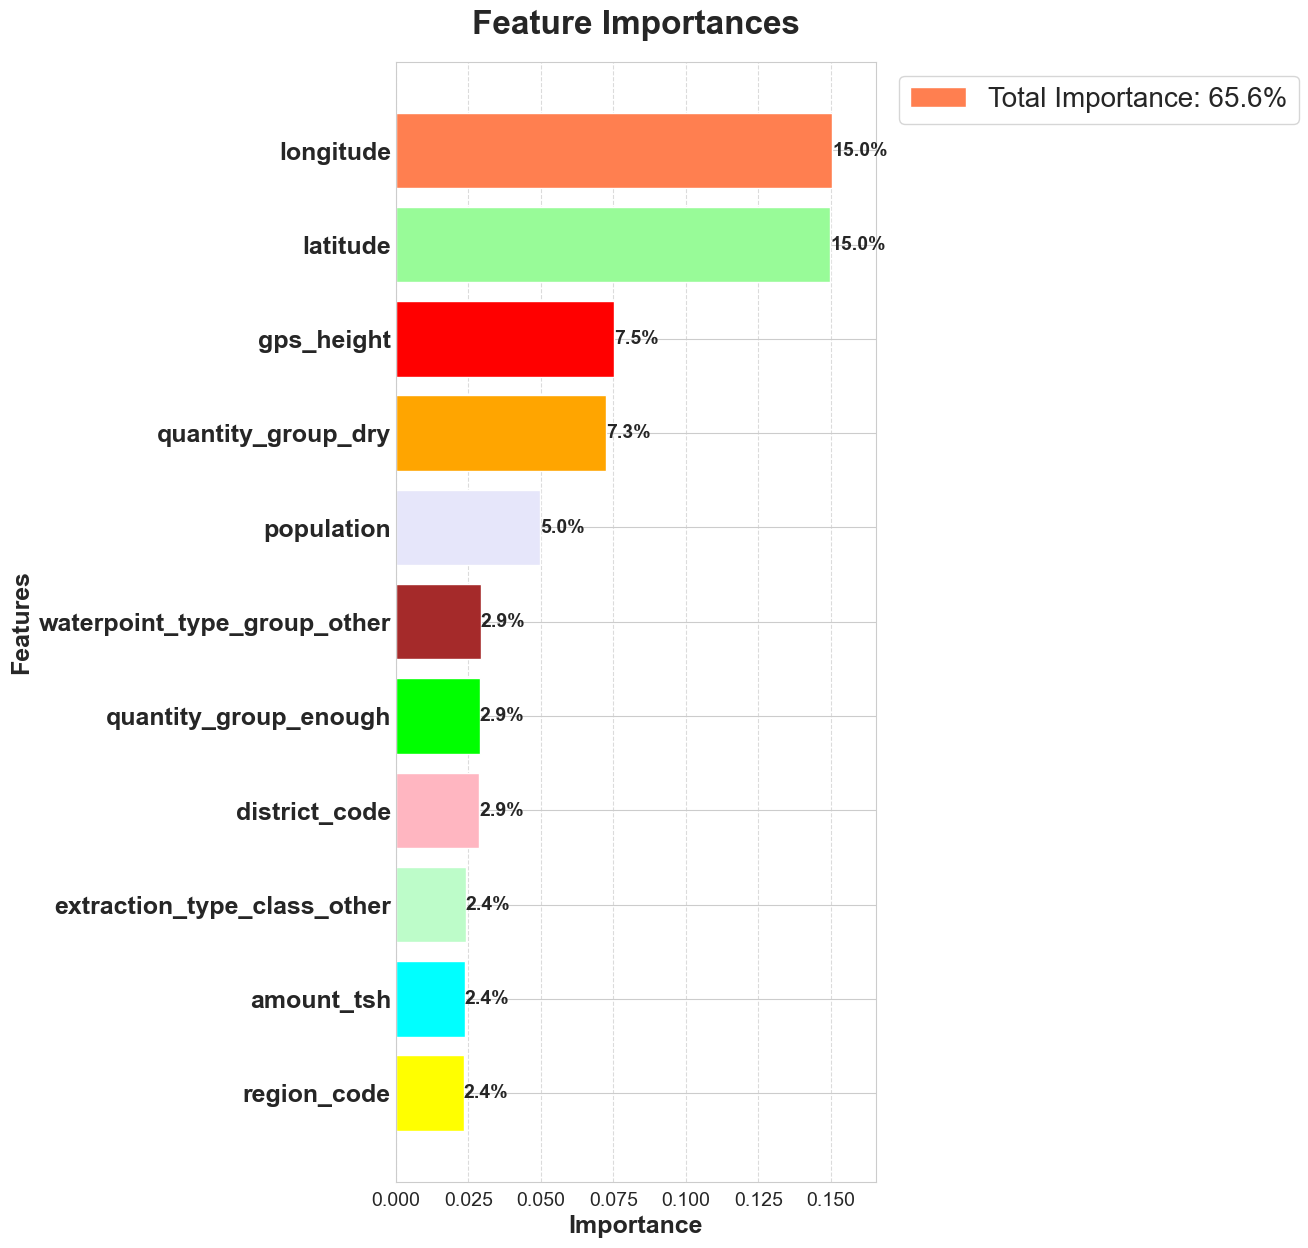

In [124]:
import matplotlib.pyplot as plt

# Select the top 11 features
top_n = 11
top_features = feature_importances_df.head(top_n)

# Set the colors for the bars
colors = ['#FF7F50', '#98FB98', 'red', 'orange', '#E6E6FA', 'brown', 'lime', '#FFB6C1', '#BDFCC9', 'cyan', 'yellow']

# Create a figure and axes with wider dimensions
fig, ax = plt.subplots(figsize=(12, 14))

# Create a vertical bar graph
bars = ax.barh(top_features['Feature'], top_features['Importance'], color=colors)

# Add percentage labels on the right of each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1%}', ha='left', va='center', fontsize=14, fontweight='bold')

# Customize the appearance
ax.set_ylabel('Features', fontsize=18, fontweight='bold')
ax.set_xlabel('Importance', fontsize=18, fontweight='bold')
ax.set_title('Feature Importances', fontsize=24, fontweight='bold', pad=20)
ax.set_xlim(0, max(top_features['Importance']) * 1.1)  # Adjust the x-axis limit
ax.tick_params(axis='y', labelsize=16, length=0)  # Remove tick marks
ax.tick_params(axis='x', labelsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis to show the most important feature at the top
ax.invert_yaxis()

# Make the column names (feature names) bigger and bolder
ax.set_yticklabels(top_features['Feature'], fontsize=18, fontweight='bold')

# Calculate the total feature importance percentage
total_importance = top_features['Importance'].sum()

# Add a legend with the total feature importance percentage outside the graph box
legend_label = f'Total Importance: {total_importance:.1%}'
ax.legend([legend_label], loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=20)

# Adjust the spacing and layout
plt.subplots_adjust(left=0.3, right=0.7, top=0.9, bottom=0.1)

# Display the plot
plt.show()

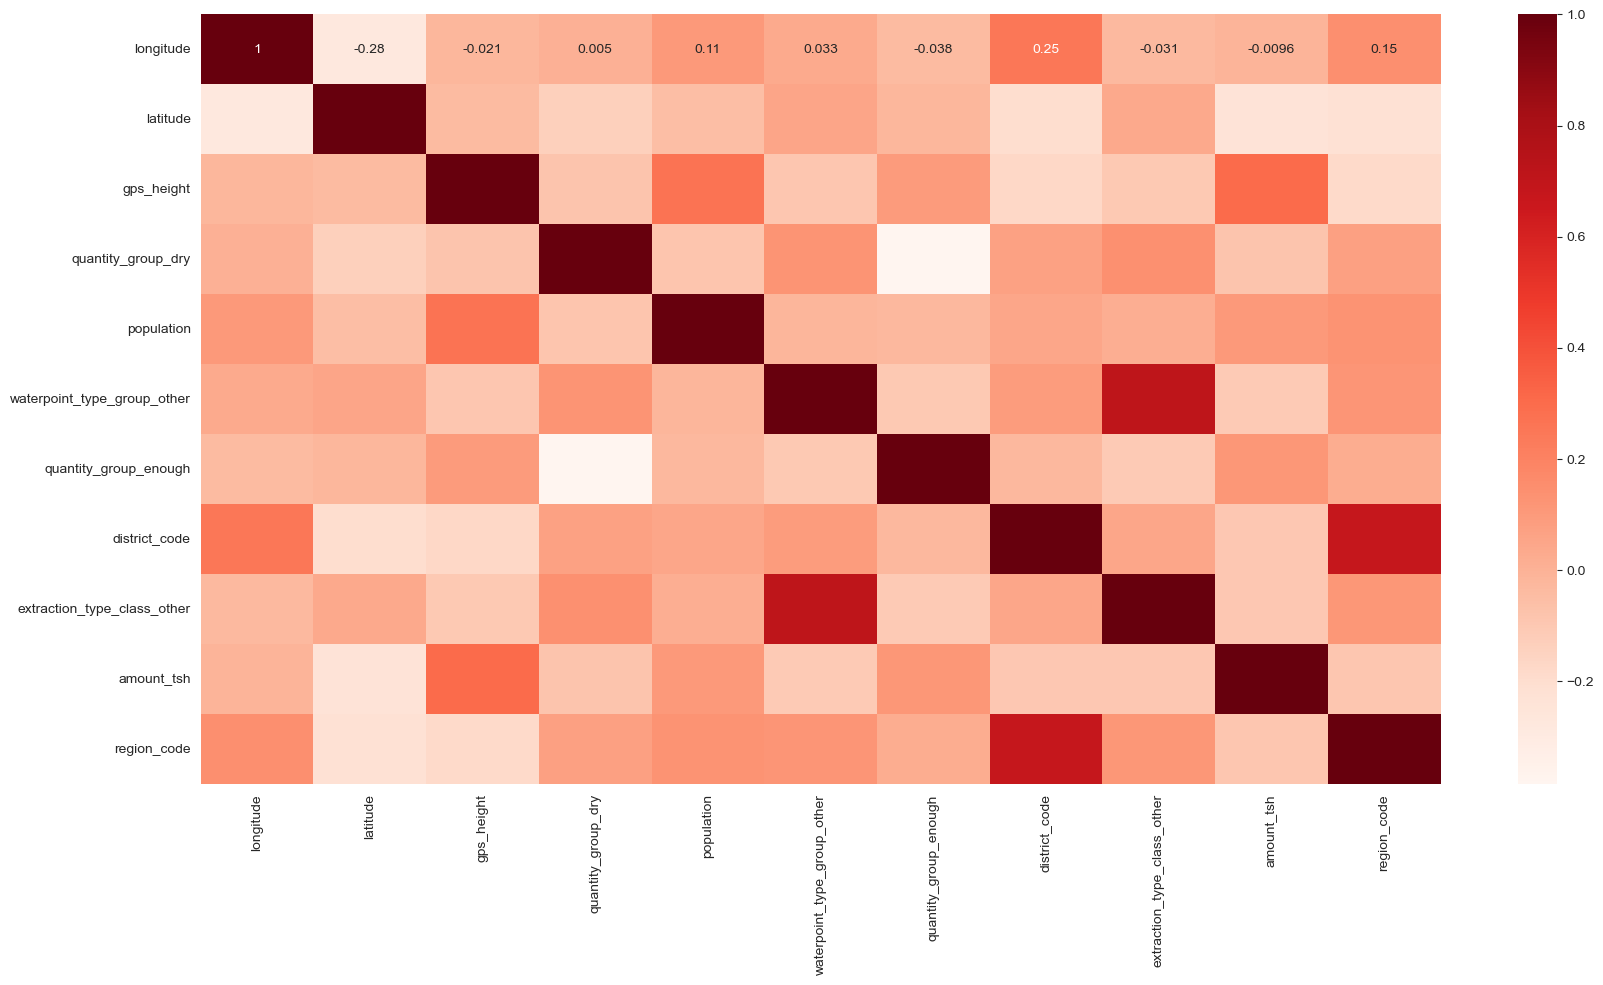

In [125]:
# Correlation matrix between the features.

cor=df_encoded[top_features['Feature']].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cor, annot=True ,cmap='Reds')
plt.show()

Re-assigning X and y after feature selection

In [126]:
X = df_encoded[top_features['Feature']]
y = df_encoded['status_group_vals']

In [127]:
X.shape

(59400, 11)

### Handling data imbalance before further steps

##### Contribution
While working with the dataset we observed that there is huge class imbalance. This imbalance could affect the classification as the model would not have equal amount of data of each class. Hence, we collectively worked on using the Data Wrangling method of Oversampling. 

ADASYN (Adaptive Synthetic Sampling) is a data oversampling technique commonly used to address class imbalance in machine learning tasks. It generates synthetic samples for the minority class by adaptively focusing on the regions where the class imbalance is more severe.

In [128]:
X.head()

,longitude,latitude,gps_height,quantity_group_dry,population,waterpoint_type_group_other,quantity_group_enough,district_code,extraction_type_class_other,amount_tsh,region_code
0,34.938093,-9.856322,1390,False,109,False,True,5,False,1200.0,11
1,34.698766,-2.147466,1399,False,280,False,False,2,False,0.0,20
2,37.460664,-3.821329,686,False,250,False,True,4,False,25.0,21
3,38.486161,-11.155298,263,True,58,False,False,63,False,0.0,90
4,31.130847,-1.825359,0,False,0,False,False,1,False,0.0,18


In [129]:
y.head()

0    2
1    2
2    2
3    0
4    2
Name: status_group_vals, dtype: int64

In [130]:
y.shape

(59400,)

In [131]:
y.value_counts()

status_group_vals
2    32259
0    22824
1     4317
Name: count, dtype: int64

functional -> 2 || functional needs repair -> 1 ||  non functional -> 0



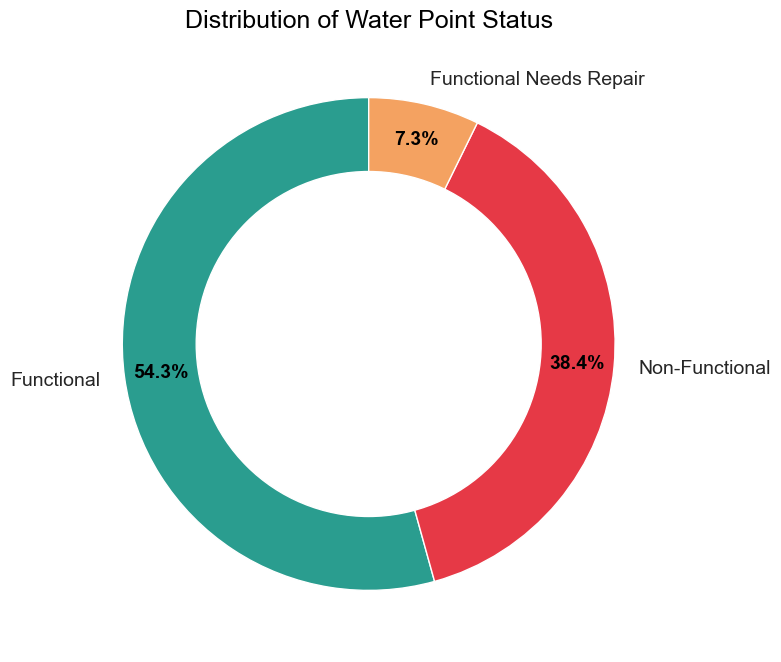

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
status_counts = y.value_counts()

# Define a distinct color palette
colors = ['#2a9d8f', '#e63946', '#f4a261']  # Red, Orange, Teal

# Create a pie chart
plt.figure(figsize=(10, 8))
pie, texts, autotexts = plt.pie(status_counts, labels=['Functional', 'Non-Functional', 'Functional Needs Repair'], autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85)

# Draw a circle at the center of pie to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Increase font size for the labels and percentage annotations
plt.title('Distribution of Water Point Status', fontsize=18, color='black')
for text in texts:
    text.set_fontsize(14)
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')
    autotext.set_color('black')

plt.show()


'functional' -> 2
'functional needs repair' -> 1
'non functional' -> 0

We see that there is imbalance in the data as we have only 7% data for 'functional_needs_repair' and 38% data for non functional. This should be balanced for the fair training of the model

/var/folders/93/5qlh2lh93tl__8bywdt_dp500000gn/T/ipykernel_29740/3390780143.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


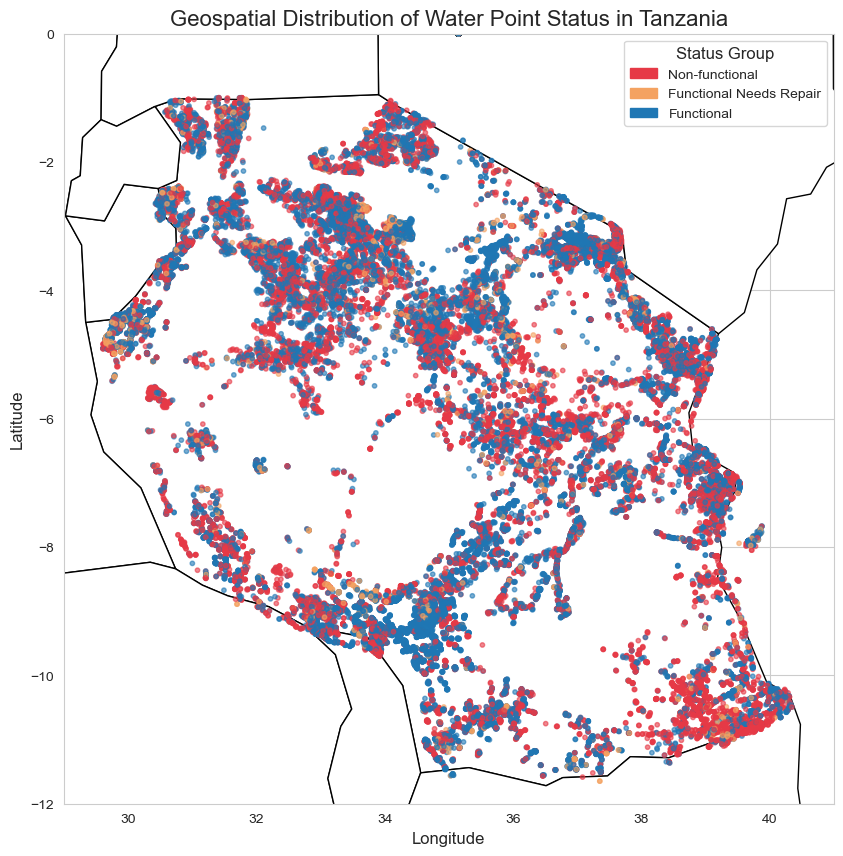

In [133]:
# Assuming the data is already loaded into a DataFrame named 'df'
# Convert the DataFrame to a GeoDataFrame using longitude and latitude
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['longitude'], df['latitude'])
)

# Load a base world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define color mapping for the status group, with 'Functional' mapped to a shade of blue
status_colors = {0: '#e63946', 1: '#f4a261', 2: '#1f77b4'}  # Adjust according to your class labels
gdf['color'] = gdf['status_group_vals'].map(status_colors)

# Plot the world map as a base layer and zoom in to Tanzania
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='white', edgecolor='black')

# Adjust the bounding box to focus on Tanzania
ax.set_xlim(29, 41)  # Longitude range
ax.set_ylim(-12, 0)  # Latitude range

# Overlay the points based on their coordinates, colored by status group
gdf.plot(ax=ax, color=gdf['color'], markersize=10, alpha=0.6)

# Add a title
plt.title('Geospatial Distribution of Water Point Status in Tanzania', fontsize=16)

# Set axis labels
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Customize legend labels with updated colors
legend_labels = [
    mpatches.Patch(color='#e63946', label='Non-functional'),
    mpatches.Patch(color='#f4a261', label='Functional Needs Repair'),
    mpatches.Patch(color='#1f77b4', label='Functional')
]

plt.legend(handles=legend_labels, title='Status Group', fontsize=10, title_fontsize=12)

plt.show()


In [134]:
# Before looking into oversampling we need to split the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234, stratify = y)

**Adaptive Synthetic Sampling Approach**

In [135]:
from imblearn.over_sampling import ADASYN

In [136]:
counter = y_train.value_counts()
print ('Before', counter,sep="\n")
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130, sampling_strategy='auto')
X_ada, Y_ada = ada.fit_resample(X_train, y_train)
counter = Y_ada.value_counts()
print ('After', counter,sep="\n")

Before
status_group_vals
2    22581
0    15977
1     3022
Name: count, dtype: int64
After
status_group_vals
1    23101
2    22581
0    22309
Name: count, dtype: int64


In [137]:
X_train_imp = X_ada.sort_index(axis=1)
y_train_ada = Y_ada

In [138]:
X_test = X_test.sort_index(axis=1)

#### Random Forest without oversampling the data

In [139]:
X_train = X_train.sort_index(axis=1)

In [140]:
# Define the hyperparameter grid
param_grid = {
              'n_estimators':[2,5,10,20,50,75,150],
              'criterion':['gini', 'entropy'],
              'max_depth':[2,5,10,20,50,None],
              'min_samples_split':[2,5,10,20]
}

In [141]:
# Create the Random Forest classifier with the grid search
rfwg_nos = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rfwg_nos, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
best_model_rf_nos = grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}
Best Accuracy: 0.7809283309283309


In [142]:
# Get the best model
grid_search.best_estimator_

# Predict the labels for the testing set
y_pred_rfgs_nos = best_model_rf_nos.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rfgs_nos))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      6847
           1       0.53      0.25      0.34      1295
           2       0.77      0.88      0.82      9678

    accuracy                           0.78     17820
   macro avg       0.70      0.62      0.64     17820
weighted avg       0.77      0.78      0.77     17820



In [143]:
# Calculate the accuracy of the model
accuracy_rfgs_nos = accuracy_score(y_test, y_pred_rfgs_nos)
print("Accuracy:", accuracy_rfgs_nos)

Accuracy: 0.7787317620650954


In [144]:
# Calculate balanced accuracy
balanced_acc_rfgs_nos = balanced_accuracy_score(y_test, y_pred_rfgs_nos)

# Print the balanced accuracy
print("Balanced Accuracy:", balanced_acc_rfgs_nos)

Balanced Accuracy: 0.6208297609674223


## 4. MODEL BUILDING

#### I. MODEL 1 - RANDOM FOREST WITHOUT HYPERPARAMETER TUNING

##### Contribution
Vedashree worked on building Random Forest model using scikit-learn.
A Random Forest model without any hyperparameter tuning was built first and the GridSearchCV was used for hyperparameter tuning of the model.

In [145]:
# Train the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [146]:
rfc.fit(X_train_imp, y_train_ada)

RandomForestClassifier(random_state=42)

In [147]:
# Evaluate the classifier on the testing set
y_pred_rf = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.7391133557800225


In [148]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      6847
           1       0.31      0.47      0.37      1295
           2       0.81      0.76      0.79      9678

    accuracy                           0.74     17820
   macro avg       0.63      0.66      0.64     17820
weighted avg       0.76      0.74      0.75     17820



In [149]:
# Calculate balanced accuracy
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)

# Print the balanced accuracy
print("Balanced Accuracy:", balanced_acc_rf)

Balanced Accuracy: 0.6637674952749882


#### I. MODEL 2 - RANDOM FOREST WITH HYPERPARAMETER TUNING

In [150]:
# Define the hyperparameter grid
param_grid = {
              'n_estimators':[2,5,10,20,50,75,150],
              'criterion':['gini', 'entropy'],
              'max_depth':[2,5,10,20,50,None],
              'min_samples_split':[2,5,10,20]
}

In [151]:
# Create the Random Forest classifier with the grid search
rfwg = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rfwg, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
best_model_rf = grid_search.fit(X_train_imp, y_train_ada)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 150}
Best Accuracy: 0.7916197085903496


In [152]:
# Get the best model
grid_search.best_estimator_

# Predict the labels for the testing set
y_pred_rfgs = best_model_rf.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rfgs))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      6847
           1       0.31      0.47      0.37      1295
           2       0.81      0.77      0.79      9678

    accuracy                           0.74     17820
   macro avg       0.63      0.66      0.64     17820
weighted avg       0.76      0.74      0.75     17820



In [153]:
# Calculate the accuracy of the model
accuracy_rfgs = accuracy_score(y_test, y_pred_rfgs)
print("Accuracy:", accuracy_rfgs)

Accuracy: 0.7396184062850729


In [154]:
# Calculate balanced accuracy
balanced_acc_rfgs = balanced_accuracy_score(y_test, y_pred_rfgs)

# Print the balanced accuracy
print("Balanced Accuracy:", balanced_acc_rfgs)

Balanced Accuracy: 0.6635318757114873


In [155]:
pickle.dump(best_model_rf, open('rf_gridsearch.pkl', 'wb'))

#### STANDARISATION AND SCALING OF THE DATA

In [156]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test)

#### MODEL 3. K-NEAREST NEIGHBOURS

#### KNN using Silhoutte & Elbow method

##### Contribution
Mohid worked on  building this model. It used K-Nearest Neighbour classifier to classify the water pumps. The model uses Elbow method to find the otpimal value of k.

In [157]:
# Define the range of k values to evaluate
k_values = range(2, 10)

In [158]:
# Find the optimal k value using the elbow method
distortions = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_ada)
    y_pred_knne = knn.predict(X_train_scaled)
    distortions.append(1 - accuracy_score(y_train_ada, y_pred_knne))

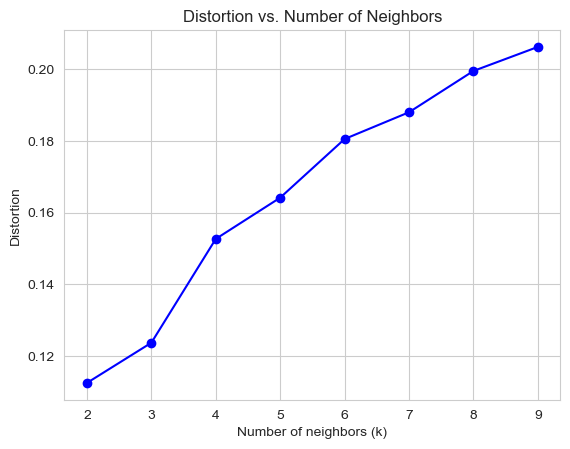

In [159]:
# Plot the distortions
plt.plot(k_values, distortions, 'bo-')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Distortion')
plt.title('Distortion vs. Number of Neighbors')
plt.show()

In [160]:
# Find the optimal k value based on the elbow method
optimal_k = distortions.index(min(distortions)) + 2
print("Optimal k value:", optimal_k)

Optimal k value: 2


In [161]:
# Train the KNN model with the optimal k value
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train_ada)

KNeighborsClassifier(n_neighbors=2)

In [162]:
# Make predictions on the testing set
y_pred_knn = knn.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

Accuracy: 0.6591470258136924


In [163]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      6847
           1       0.25      0.51      0.34      1295
           2       0.83      0.57      0.68      9678

    accuracy                           0.66     17820
   macro avg       0.58      0.63      0.58     17820
weighted avg       0.72      0.66      0.67     17820



In [164]:
# Calculate balanced accuracy
balanced_acc_knn = balanced_accuracy_score(y_test, y_pred_knn)

# Print the balanced accuracy
print("Balanced Accuracy:", balanced_acc_knn)

Balanced Accuracy: 0.6310711417012266


In [165]:
pickle.dump(knn, open('knn.pkl', 'wb'))

#### MODEL 4. XGBoost WITHOUT HYPERPARAMETER TUNING

#### XGBoost

Razi worked on building XGBoost (Extreme Gradient Boosting) model. XGBoost model is widely used for both classification and regression tasks because of its high performance.

First model of XGBoost is a simple model without any hyperparameter tuning. Then RandomisedSearchCV was used to find the best hyperparameters for the model.

In [166]:
# Define the XGBoost classifier
xgb = XGBClassifier(min_child_weight=1,
                      max_depth=10, 
                      learning_rate=0.05, 
                      gamma=0.1, 
                      colsample_bytree=0.4, 
                      booster='gbtree')

In [167]:
# Train the classifier
xgb.fit(X_train_scaled, y_train_ada)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [168]:
# Make predictions on the testing set
y_pred_xgb = xgb.predict(X_test_scaled)

In [169]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.6807519640852974


In [170]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.66      0.73      6847
           1       0.23      0.62      0.33      1295
           2       0.79      0.70      0.74      9678

    accuracy                           0.68     17820
   macro avg       0.61      0.66      0.60     17820
weighted avg       0.75      0.68      0.71     17820



In [171]:
print(balanced_accuracy_score(y_test, y_pred_xgb))

0.6621917541621447


In [172]:
pickle.dump(xgb, open('xgb.pkl', 'wb'))

#### MODEL 4. XGBoost WITH HYPERPARAMETER TUNING

##### Using RandomizedSearchCV to optimise XGBoost

In [173]:
# Define the XGBoost classifier
xgb_classifier = XGBClassifier()

In [174]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'subsample': np.arange(0.6, 1.0, 0.1),
    'gamma': np.arange(0, 1.5, 0.1),
}

In [175]:
# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=xgb_classifier,
                                   param_distributions=param_grid, 
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=5, 
                                   verbose=1, 
                                   random_state=42)

In [177]:
random_search.fit(X_train_scaled, y_train_ada)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4]),
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190]),
                                        'subsample': array([0.6, 0.7, 0.8, 0.9])},
                   random_state=42, scoring='accuracy', verbose=1)

In [178]:
# Get the best model
best_model_xgb = random_search.best_estimator_

In [179]:
# Make predictions on the testing set
y_pred_xgbrs = best_model_xgb.predict(X_test_scaled)

In [180]:
# Calculate the accuracy of the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgbrs)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.6838383838383838


In [181]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgbrs))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73      6847
           1       0.23      0.63      0.34      1295
           2       0.78      0.71      0.74      9678

    accuracy                           0.68     17820
   macro avg       0.61      0.67      0.60     17820
weighted avg       0.76      0.68      0.71     17820



In [182]:
# Calculate balanced accuracy
balanced_acc_xgbrs = balanced_accuracy_score(y_test, y_pred_xgbrs)

# Print the balanced accuracy
print("Balanced Accuracy:", balanced_acc_xgbrs)

Balanced Accuracy: 0.6658693066692063


In [183]:
pickle.dump(best_model_xgb, open('xgb_rs.pkl', 'wb'))

#### MODEL 5. SIMPLE ARTIFICIAL NEURAL NETWORK

##### Simple ANN

##### Contribution
Mohid worked on building a vanilla neural network to see how well the simple Artificial Neural network works with the classification of the water pumps. Dense layers were built, relu and softmax activation functions were used to build the model.

In [184]:
# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax') # Adjust the number of output classes based on your dataset
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [185]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [186]:
# Train the model
model.fit(X_train_scaled, y_train_ada, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.5440 - loss: 0.9221 - val_accuracy: 0.5562 - val_loss: 0.8962
Epoch 2/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 1s 352us/step - accuracy: 0.5938 - loss: 0.8596 - val_accuracy: 0.5735 - val_loss: 0.8813
Epoch 3/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.6017 - loss: 0.8477 - val_accuracy: 0.6258 - val_loss: 0.8178
Epoch 4/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.6166 - loss: 0.8265 - val_accuracy: 0.5941 - val_loss: 0.8650
Epoch 5/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.6247 - loss: 0.8186 - val_accuracy: 0.5994 - val_loss: 0.8412
Epoch 6/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step - accuracy: 0.6287 - loss: 0.8104 - val_accuracy: 0.6134 - val_loss: 0.8135
Epoch 7/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.6299 - loss: 0.8044 - val_accuracy: 0.6105 - val_loss: 0.8240
Epoch 8/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.6361 -

In [187]:
# Evaluate the model
y_pred_probs = model.predict(X_test_scaled)
y_pred_ann = y_pred_probs.argmax(axis=1)
confusion_mtx = confusion_matrix(y_test, y_pred_ann)
balanced_acc = balanced_accuracy_score(y_test, y_pred_ann)
classification_rep = classification_report(y_test, y_pred_ann)

print("Confusion Matrix:")
print(confusion_mtx)
print("Balanced Accuracy:", balanced_acc)
print("\nClassification Report:")
print(classification_rep)

557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step
Confusion Matrix:
[[4378 1177 1292]
 [ 160  859  276]
 [1339 2625 5714]]
Balanced Accuracy: 0.6310452746348982

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      6847
           1       0.18      0.66      0.29      1295
           2       0.78      0.59      0.67      9678

    accuracy                           0.61     17820
   macro avg       0.57      0.63      0.55     17820
weighted avg       0.73      0.61      0.65     17820



In [188]:
# Calculate the accuracy of the model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("Accuracy:", accuracy_ann)

Accuracy: 0.6145342312008979


In [189]:
# Calculate balanced accuracy
balanced_acc_ann = balanced_accuracy_score(y_test, y_pred_ann)

# Print the balanced accuracy
print("Balanced Accuracy:", balanced_acc_ann)

Balanced Accuracy: 0.6310452746348982


In [190]:
pickle.dump(model, open('ann.pkl', 'wb'))

## 5. MODEL SELECTION AND CONCLUSION

### Comparing Accuracy and Balanced accuracy of all our models.

##### Contribution
All three of us collectively wokred on comparing the results of all the models build by our team and selected a model that seemed to work the best for the water pump classification task.

In [191]:
# Accuracy and balanced accuracy values for each model
accuracy = [accuracy_rfgs, accuracy_knn, accuracy_xgb, accuracy_ann]
balanced_accuracy = [balanced_acc_rfgs, balanced_acc_knn, balanced_acc_xgbrs, balanced_acc_ann]
rounded_acc_val = []
rounded_bal_acc_val = []

for var in accuracy:
    rounded_var = round(var, 3)
    rounded_acc_val.append(rounded_var)
    
for var in balanced_accuracy:
    rounded_var = round(var, 3)
    rounded_bal_acc_val.append(rounded_var)

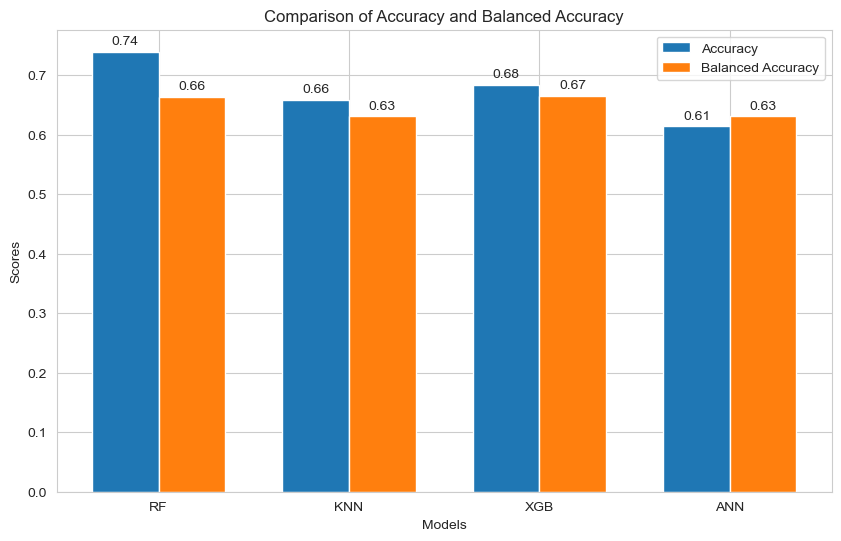

In [192]:
# Model names
model_names = ['RF', 'KNN', 'XGB', 'ANN']

# Bar positions for the x-axis
x = np.arange(len(model_names))

# Width of each bar
width = 0.35

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
accuracy_bars = ax.bar(x - width/2, accuracy, width=width, label='Accuracy')
balanced_accuracy_bars = ax.bar(x + width/2, balanced_accuracy, width=width, label='Balanced Accuracy')

# X-axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy and Balanced Accuracy')

# X-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(model_names)

# Legend
ax.legend(loc='upper right')

# Add value labels to the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

autolabel(accuracy_bars)
autolabel(balanced_accuracy_bars)

# Display the plot
plt.show()

## TESTING CODE

All three of us collectively worked on building a test code to read the test dataset and to add the classification labels for the test data.

In [193]:
# Get the file path from the user
file_path = input("Enter the file path: ")

# Check the file extension
if file_path.endswith('.csv'):
    # Read CSV file
    df_test = pd.read_csv(file_path)
elif file_path.endswith('.xls') or file_path.endswith('.xlsx'):
    # Read XLS/XLSX file
    df_test = pd.read_excel(file_path)
else:
    print("Invalid file format. Please provide a CSV or XLS/XLSX file.")
    exit()

Enter the file path: test_set_values.csv


In [194]:
df_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [195]:
df_test.shape

(14850, 40)

In [196]:
df_test.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


##### Filtering only the important features

In [197]:
selected_columns = ['id', 'longitude', 'latitude', 'gps_height', 'quantity_group', 'population', 
                    'waterpoint_type_group', 'district_code', 'amount_tsh',
                    'extraction_type_class', 'region_code',]

In [198]:
df_test = df_test[selected_columns]

##### Pre-processing the test data

In [199]:
df_test.head()

,id,longitude,latitude,gps_height,quantity_group,population,waterpoint_type_group,district_code,amount_tsh,extraction_type_class,region_code
0,50785,35.290799,-4.059696,1996,seasonal,321,other,3,0.0,other,21
1,51630,36.656709,-3.309214,1569,insufficient,300,communal standpipe,2,0.0,gravity,2
2,17168,34.767863,-5.004344,1567,insufficient,500,other,2,0.0,other,13
3,45559,38.058046,-9.418672,267,dry,250,other,43,0.0,other,80
4,49871,35.006123,-10.950412,1260,enough,60,communal standpipe,3,500.0,gravity,10


In [200]:
# printing the number of null values
df_test.isnull().sum()[df_test.isnull().sum() > 1]

Series([], dtype: int64)

There are no missing values in the selected columns, hence we move ahead.

### Outlier detection

In [201]:
# Filter only numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Select only numerical data
numerical_df = df[numerical_columns]

In [202]:
# set the z-score threshold for identifying outliers
threshold = 5

# find columns with z-scores greater than the threshold
outlier_columns = numerical_df.columns[(np.abs((numerical_df - numerical_df.mean()) / numerical_df.std()) > threshold).any()]

# print the columns that may need outlier handling
print(outlier_columns)

Index(['district_code'], dtype='object')


In [203]:
# create dataset to include only the outlier columns
outlier_df = numerical_df[outlier_columns]
outlier_df

,district_code
0,5
1,2
2,4
3,63
4,1
...,...
59395,5
59396,4
59397,7
59398,4


In [204]:
# district_code is unique so outlier should'nt matter much. Hence dropping the column from outlier handling
outlier_df = outlier_df.drop('district_code',axis=1)

In [205]:
df_encoded_test = df_test.copy()

In [206]:
#Performing one-hot encoding to convert the categorical columns to numerical
# Select categorical columns
categorical_columns_test = df_encoded_test.select_dtypes(include=['object']).columns

# Perform one-hot encoding using get_dummies
df_encoded_test = pd.get_dummies(df_encoded_test, columns=categorical_columns_test)

In [207]:
# shape of df_encoded
df_encoded_test.shape

(14850, 26)

In [208]:
df_encoded_test.describe()

,id,longitude,latitude,gps_height,population,district_code,amount_tsh,region_code
count,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,34.061605,-5.684724e+00,655.147609,184.114209,5.626397,322.826983,15.139057
std,21359.364833,6.593034,2.940803e+00,691.261185,469.499332,9.673842,2510.968644,17.191329
min,10.000000,0.000000,-1.156459e+01,-57.000000,0.000000,0.000000,0.000000,1.000000
25%,18727.000000,33.069455,-8.443970e+00,0.000000,0.000000,2.000000,0.000000,5.000000
50%,37361.500000,34.901215,-5.049750e+00,344.000000,20.000000,3.000000,0.000000,12.000000
75%,55799.750000,37.196594,-3.320594e+00,1308.000000,220.000000,5.000000,25.000000,17.000000
max,74249.000000,40.325016,-2.000000e-08,2777.000000,11469.000000,80.000000,200000.000000,99.000000


In [209]:
selected_columns_after_encoding = ['id', 'longitude','latitude', 'gps_height', 'quantity_group_dry', 'population',
                                   'district_code', 'waterpoint_type_group_other', 'amount_tsh', 
                                   'quantity_group_enough', 'extraction_type_class_other', 'region_code']

In [210]:
# Filtering encoded data according to model
df_encoded_test = df_encoded_test[selected_columns_after_encoding]

In [211]:
columns_for_prediction = ['longitude','latitude', 'gps_height', 'quantity_group_dry', 'population',
                                   'district_code', 'waterpoint_type_group_other', 'amount_tsh', 
                                   'quantity_group_enough', 'extraction_type_class_other', 'region_code']

In [212]:
df_encoded_test1 = df_encoded_test[columns_for_prediction]

In [213]:
model_rf = pickle.load(open('rf_gridsearch.pkl', 'rb'))

In [214]:
model_rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20, 50, None],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [2, 5, 10, 20, 50, 75, 150]})

In [215]:
df_encoded_test1.head()

,longitude,latitude,gps_height,quantity_group_dry,population,district_code,waterpoint_type_group_other,amount_tsh,quantity_group_enough,extraction_type_class_other,region_code
0,35.290799,-4.059696,1996,False,321,3,True,0.0,False,True,21
1,36.656709,-3.309214,1569,False,300,2,False,0.0,False,False,2
2,34.767863,-5.004344,1567,False,500,2,True,0.0,False,True,13
3,38.058046,-9.418672,267,True,250,43,True,0.0,False,True,80
4,35.006123,-10.950412,1260,False,60,3,False,500.0,True,False,10


In [216]:
df_encoded_test1 = df_encoded_test1.sort_index(axis=1)

In [217]:
#model prediction
y_pred = model_rf.predict(df_encoded_test1)

In [218]:
y_pred

array([0, 1, 1, ..., 2, 2, 0])

In [219]:
df_encoded_test1['status_group_vals'] = y_pred

In [220]:
df_encoded_test['status_group_vals'] = df_encoded_test1['status_group_vals']

In [221]:
# Converting numerical values of status_group to text
status_group_text={2:'functional', 1:'functional needs repair',
                   0:'non functional'}
df_encoded_test['status_group']=df_encoded_test1.status_group_vals.replace(status_group_text)

In [222]:
res_cols = ['id', 'region_code', 'district_code','longitude','latitude', 'status_group']

In [223]:
df_results = df_encoded_test[res_cols]

In [224]:
#Test labels
df_results.to_excel('FinalTest_WaterPumpStatus.xlsx',index = False, header=True)

### END OF THE CODE